<a href="https://colab.research.google.com/github/STYLO009/machine_learning/blob/main/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [22]:
df = pd.read_csv('nifty.csv')

In [23]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_12,EMA_26,MACD,Signal_Line,RSI_14,BB_Mid,BB_Upper,BB_Lower,Daily_Return_%
0,2007-09-17,4494.649902,4494.649902,4549.049805,4482.850098,4518.450195,0,NaN,NaN,4494.649902,4494.649902,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
1,2007-09-18,4546.200195,4546.200195,4551.799805,4481.549805,4494.100098,0,NaN,NaN,4502.580717,4498.468443,4.112274,0.822455,NaN,NaN,NaN,NaN,1.146926
2,2007-09-19,4732.350098,4732.350098,4739.000000,4550.250000,4550.250000,0,NaN,NaN,4537.929852,4515.793010,22.136843,5.085332,NaN,NaN,NaN,NaN,4.094626
3,2007-09-20,4747.549805,4747.549805,4760.850098,4721.149902,4734.850098,0,NaN,NaN,4570.179076,4532.960180,37.218896,11.512045,NaN,NaN,NaN,NaN,0.321187
4,2007-09-21,4837.549805,4837.549805,4855.700195,4733.700195,4752.950195,0,NaN,NaN,4611.313034,4555.522374,55.790660,20.367768,NaN,NaN,NaN,NaN,1.895715


In [24]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4452 entries, 0 to 4451
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4452 non-null   object 
 1   Adj Close       4452 non-null   float64
 2   Close           4452 non-null   float64
 3   High            4452 non-null   float64
 4   Low             4452 non-null   float64
 5   Open            4452 non-null   float64
 6   Volume          4452 non-null   int64  
 7   SMA_20          4433 non-null   float64
 8   SMA_50          4403 non-null   float64
 9   EMA_12          4452 non-null   float64
 10  EMA_26          4452 non-null   float64
 11  MACD            4452 non-null   float64
 12  Signal_Line     4452 non-null   float64
 13  RSI_14          4439 non-null   float64
 14  BB_Mid          4433 non-null   float64
 15  BB_Upper        4433 non-null   float64
 16  BB_Lower        4433 non-null   float64
 17  Daily_Return_%  4451 non-null   f

,Adj Close,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_12,EMA_26,MACD,Signal_Line,RSI_14,BB_Mid,BB_Upper,BB_Lower,Daily_Return_%
count,4452.000000,4452.000000,4452.000000,4452.000000,4452.000000,4.452000e+03,4433.000000,4403.000000,4452.000000,4452.000000,4452.000000,4452.000000,4439.000000,4433.000000,4433.000000,4433.000000,4451.000000
mean,10795.561145,10795.561145,10859.010040,10729.294964,10801.745070,2.105312e+05,10776.242660,10744.913467,10769.420114,10736.468540,32.951574,32.803405,54.489058,10776.242660,11147.962578,10404.522742,0.047750
std,6215.796863,6215.796863,6236.326247,6193.903055,6218.018915,2.059251e+05,6180.695745,6129.581144,6194.222831,6167.423115,135.923287,128.248232,17.609882,6180.695745,6314.925399,6054.002352,1.309210
min,2524.199951,2524.199951,2585.300049,2252.750000,2553.600098,0.000000e+00,2715.179956,2784.175981,2668.153822,2731.309988,-1005.837460,-848.332753,2.022397,2715.179956,2871.558257,2432.866318,-12.980466
25%,5673.649902,5673.649902,5713.500000,5633.062622,5674.125000,0.000000e+00,5683.389990,5704.710498,5674.439327,5650.643036,-40.835049,-37.422700,42.015956,5683.389990,5976.489322,5418.355724,-0.525447
50%,8670.075195,8670.075195,8723.075195,8616.200195,8685.575195,1.876000e+05,8662.245020,8652.656973,8665.300320,8631.312411,38.157646,38.343579,53.989733,8662.245020,8945.163989,8369.340667,0.064495
75%,15173.674805,15173.674805,15252.125000,15068.562744,15190.187744,2.924250e+05,15003.235010,14846.559473,14984.906942,14855.602426,102.941111,96.740650,67.400320,15003.235010,15665.493144,14531.973415,0.655627
max,26216.050781,26216.050781,26277.349609,26151.400391,26248.250000,1.811000e+06,25678.912500,25243.475039,25769.119830,25541.072215,451.083428,413.985339,100.000000,25678.912500,26397.990803,25183.642143,17.744066


In [25]:
df.isnull().sum()

,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA_20,19
SMA_50,49
EMA_12,0


In [26]:
df.duplicated().sum()

np.int64(0)

In [27]:
df.value_counts()

,,,,,,,,,,,,,,,,,,count
Date,Adj Close,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_12,EMA_26,MACD,Signal_Line,RSI_14,BB_Mid,BB_Upper,BB_Lower,Daily_Return_%,
2025-11-11,25694.949219,25694.949219,25715.800781,25449.250000,25617.000000,297700,25678.912500,25243.475039,25654.626737,25541.072215,113.554522,164.912163,44.342176,25678.912500,26174.182857,25183.642143,0.471565,1
2007-11-27,5698.149902,5698.149902,5743.549805,5655.600098,5729.250000,0,5777.994995,5440.556992,5712.206380,5654.110562,58.095818,102.547861,46.179454,5777.994995,6040.365142,5515.624848,-0.585346,1
2007-11-28,5617.549805,5617.549805,5749.950195,5595.500000,5699.549805,0,5765.434985,5463.014990,5697.643830,5651.402358,46.241473,91.286583,43.315473,5765.434985,6033.500986,5497.368985,-1.414496,1
2025-10-16,25585.300781,25585.300781,25625.400391,25376.849609,25394.900391,372800,25084.122656,24908.524141,25191.484531,25079.821827,111.662704,61.841289,70.943053,25084.122656,25612.463155,24555.782158,1.033623,1
2025-10-15,25323.550781,25323.550781,25365.150391,25159.349609,25181.949219,289900,25071.370117,24891.273125,25119.881576,25039.383511,80.498065,49.385935,58.534167,25071.370117,25559.563155,24583.177079,0.708082,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-12-06,5954.700195,5954.700195,6027.049805,5919.799805,5941.049805,0,5760.422510,5588.628994,5802.967951,5724.580981,78.386971,69.169968,52.244270,5760.422510,6042.892471,5477.952548,0.247478,1
2007-12-05,5940.000000,5940.000000,5949.299805,5859.950195,5861.899902,0,5751.805005,5568.311992,5775.380270,5706.171443,69.208827,66.865718,51.320268,5751.805005,6019.446103,5484.163906,1.393735,1
2007-12-04,5858.350098,5858.350098,5897.250000,5840.299805,5870.200195,0,5744.130005,5548.155996,5745.449410,5687.465159,57.984251,66.279940,46.025491,5744.130005,5997.469437,5490.790573,-0.113383,1


In [28]:
df.rename(columns={'Daily_Return_%' : 'dailyreturn'}, inplace=True)

In [29]:
df

,Date,Adj Close,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_12,EMA_26,MACD,Signal_Line,RSI_14,BB_Mid,BB_Upper,BB_Lower,dailyreturn
0,2007-09-17,4494.649902,4494.649902,4549.049805,4482.850098,4518.450195,0,NaN,NaN,4494.649902,4494.649902,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
1,2007-09-18,4546.200195,4546.200195,4551.799805,4481.549805,4494.100098,0,NaN,NaN,4502.580717,4498.468443,4.112274,0.822455,NaN,NaN,NaN,NaN,1.146926
2,2007-09-19,4732.350098,4732.350098,4739.000000,4550.250000,4550.250000,0,NaN,NaN,4537.929852,4515.793010,22.136843,5.085332,NaN,NaN,NaN,NaN,4.094626
3,2007-09-20,4747.549805,4747.549805,4760.850098,4721.149902,4734.850098,0,NaN,NaN,4570.179076,4532.960180,37.218896,11.512045,NaN,NaN,NaN,NaN,0.321187
4,2007-09-21,4837.549805,4837.549805,4855.700195,4733.700195,4752.950195,0,NaN,NaN,4611.313034,4555.522374,55.790660,20.367768,NaN,NaN,NaN,NaN,1.895715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,2025-11-04,25597.650391,25597.650391,25787.400391,25578.400391,25744.750000,305100,25596.427637,25179.065078,25724.141653,25529.183470,194.958184,217.690385,63.303600,25596.427637,26258.547865,24934.307409,-0.643159
4448,2025-11-06,25509.699219,25509.699219,25679.150391,25491.550781,25593.349609,371900,25616.497559,25191.857070,25691.150510,25527.740192,163.410318,206.834372,55.783688,25616.497559,26239.497624,24993.497493,-0.343591
4449,2025-11-07,25492.300781,25492.300781,25551.250000,25318.449219,25433.800781,305600,25638.805078,25202.348086,25660.558244,25525.115050,135.443194,192.556136,46.593163,25638.805078,26205.195232,25072.414925,-0.068203
4450,2025-11-10,25574.349609,25574.349609,25653.449219,25503.500000,25503.500000,243600,25658.432520,25219.594063,25647.295377,25528.762055,118.533322,177.751573,44.876748,25658.432520,26183.866962,25132.998077,0.321857


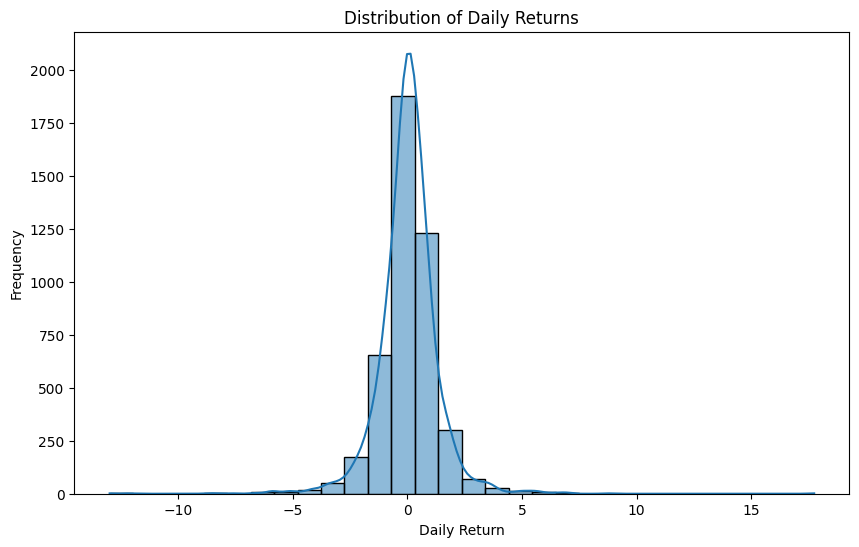

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(data = df,x = 'dailyreturn', bins = 30, kde = True)
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns')
plt.show()

Text(0.5, 0, 'Daily Return')

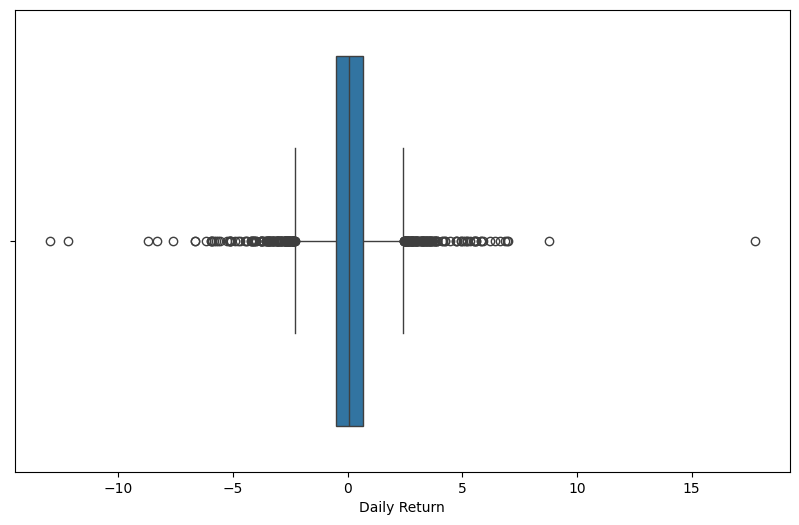

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df, x = 'dailyreturn')
plt.xlabel('Daily Return')

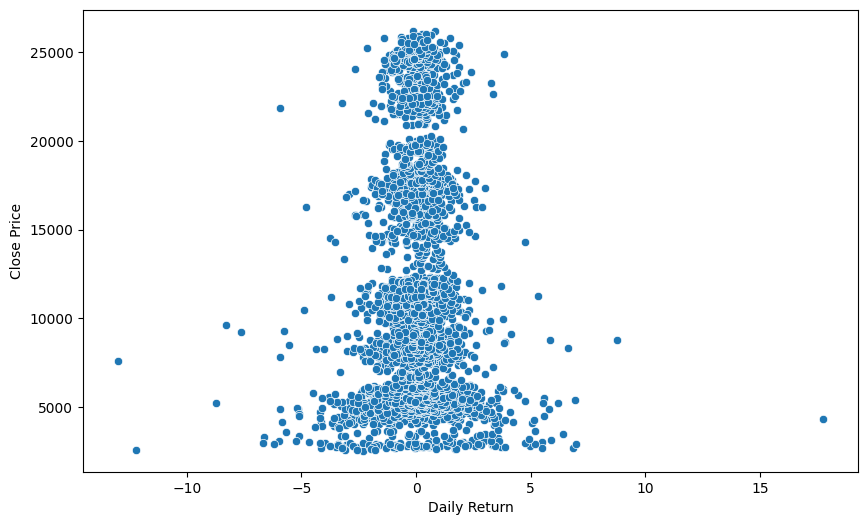

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'dailyreturn', y = 'Close')
plt.xlabel('Daily Return')
plt.ylabel('Close Price')
plt.show()

In [35]:
df_cleaned = df.copy()

In [56]:
df_cleaned.fillna(0,inplace=True)

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cleaned['Date'] = le.fit_transform(df_cleaned['Date'])

In [50]:
final = df_cleaned.copy()

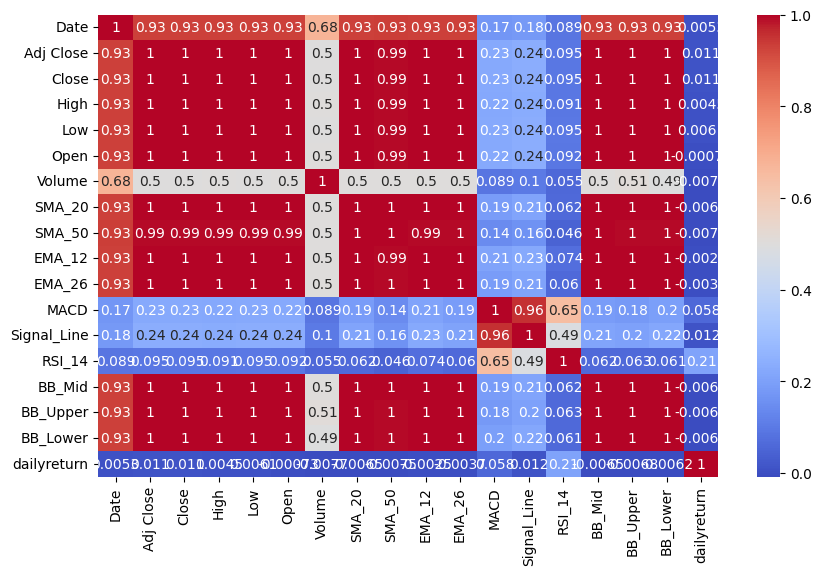

In [51]:
plt.figure(figsize=(10,6))
sns.heatmap(final.corr(), annot=True, cmap = 'coolwarm')
plt.show()

<Figure size 1000x600 with 0 Axes>

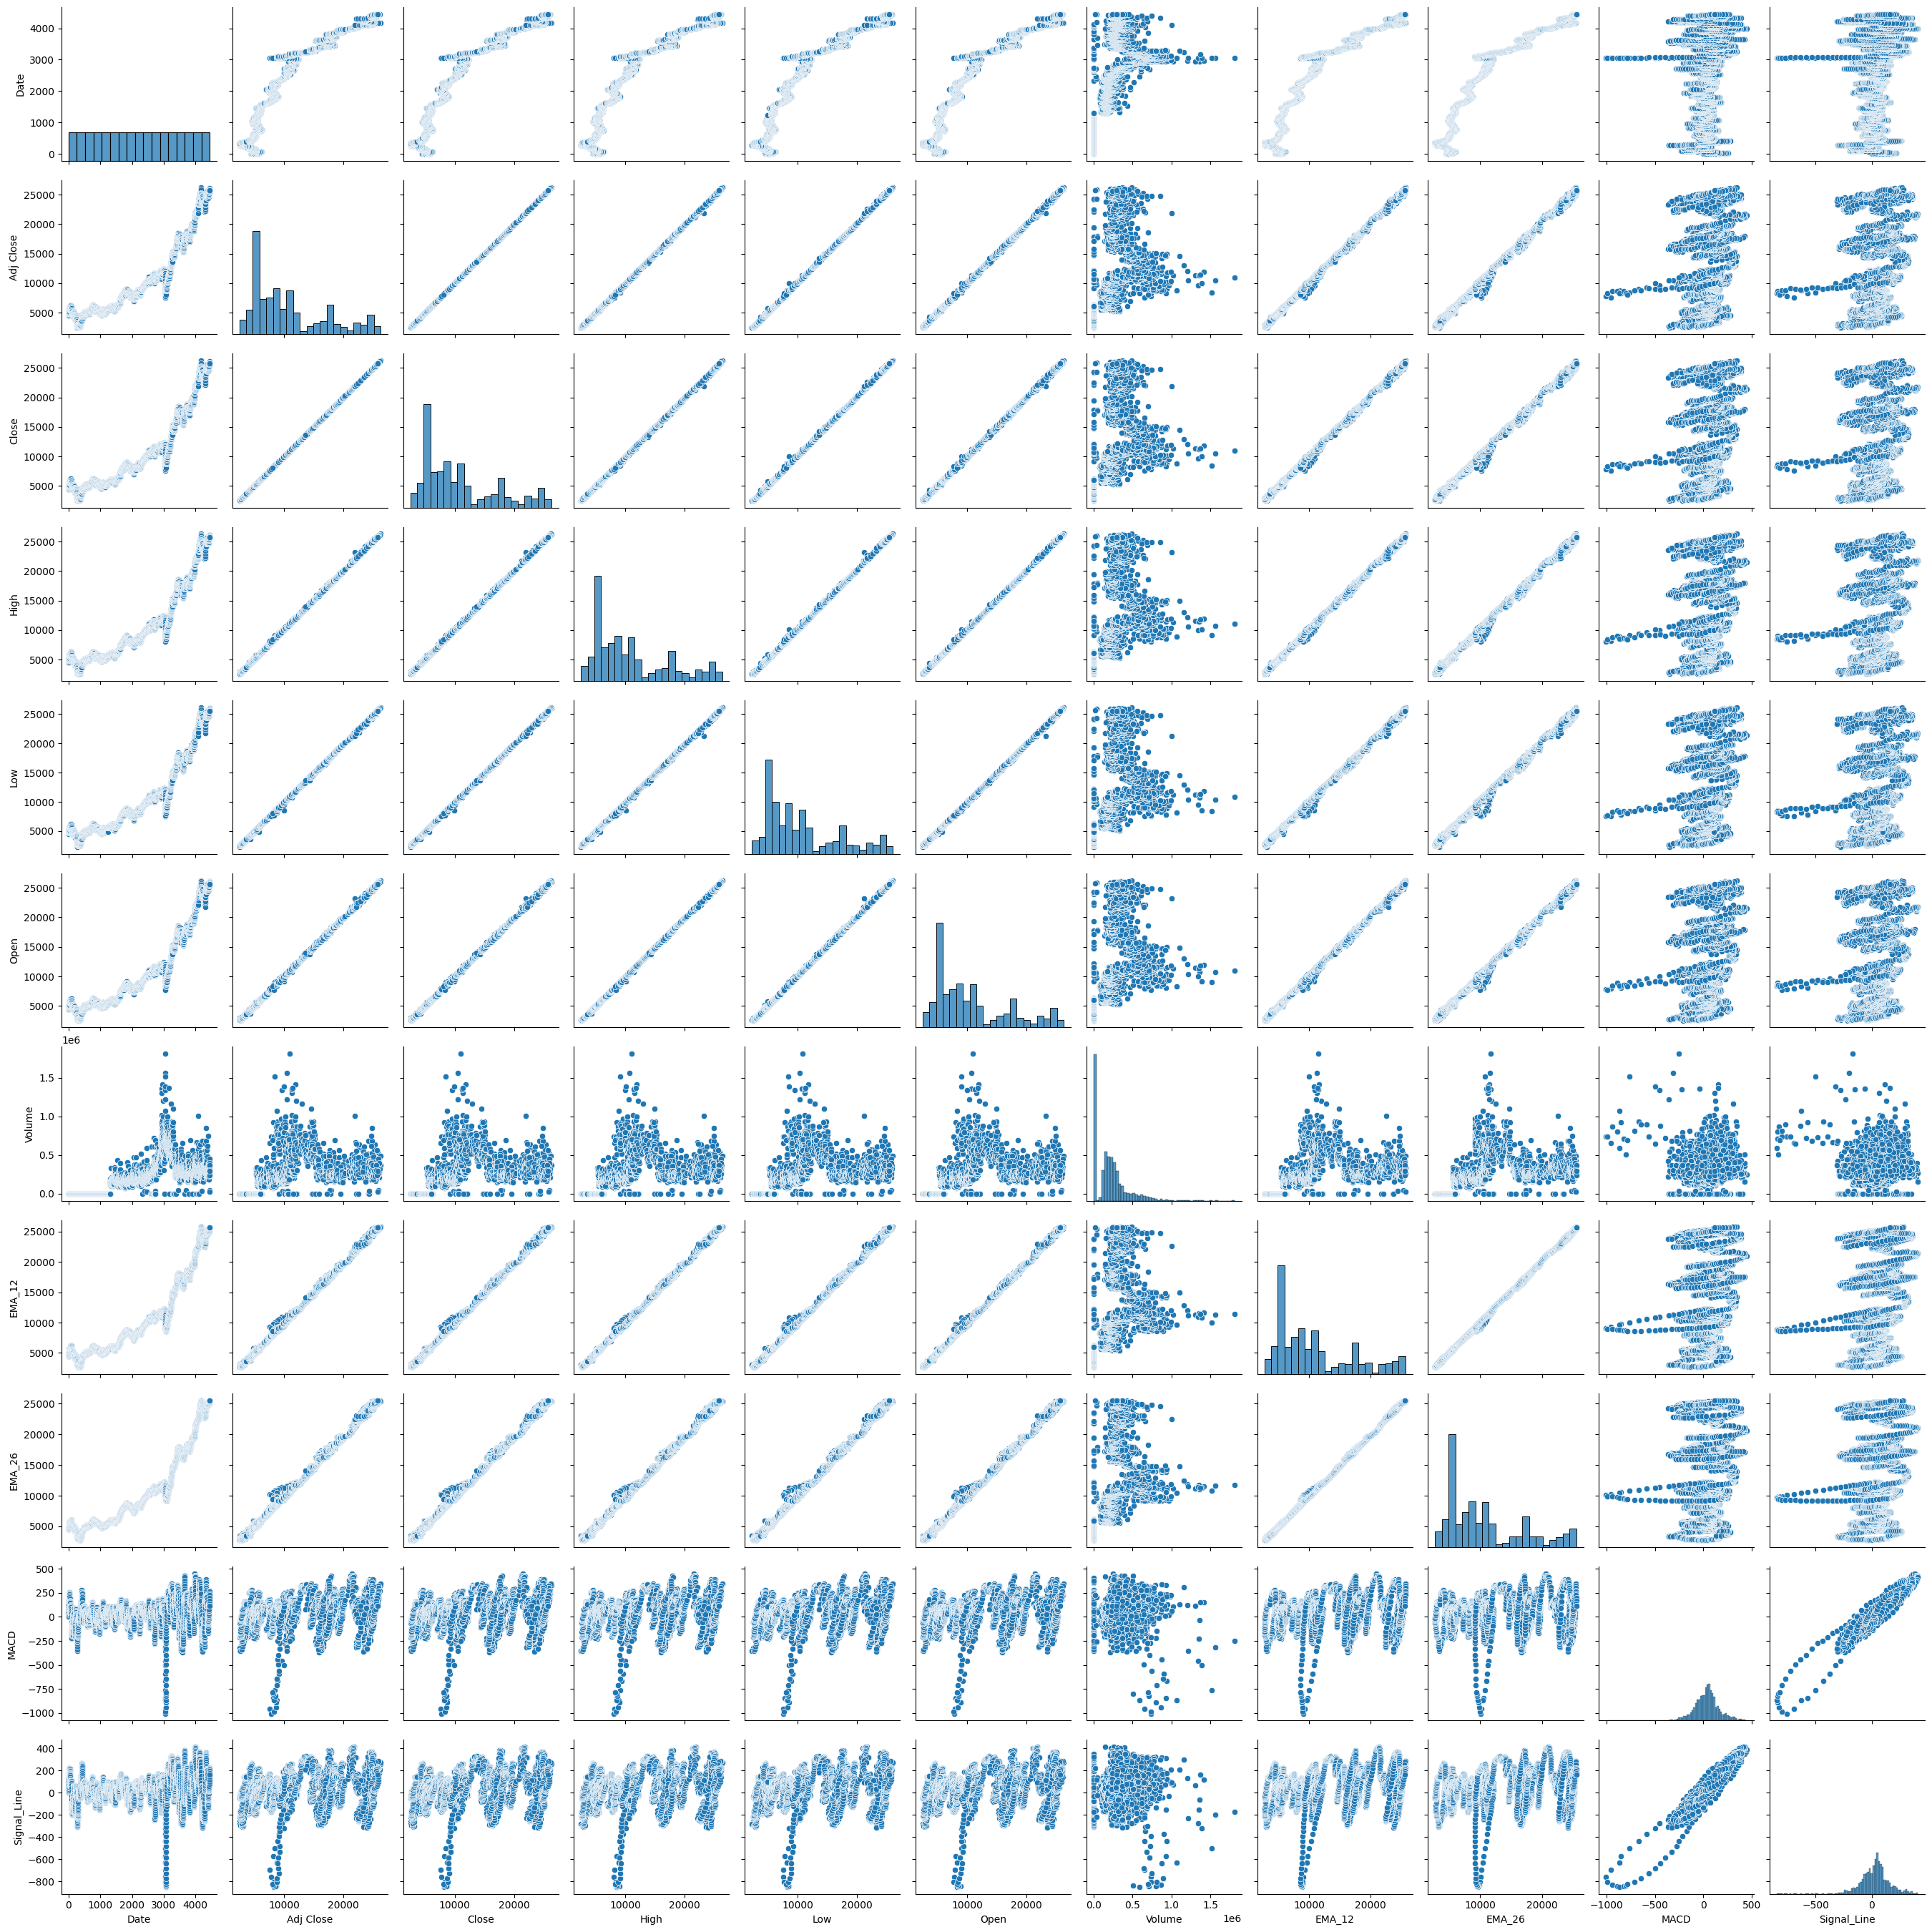

In [52]:
plt.figure(figsize=(10,6))
sns.pairplot(final)
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
X = final.drop('dailyreturn', axis=1)
y = final['dailyreturn']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [60]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('Mean Squared Error:','-'*10,'>',mse)
print('R-squared:','-'*10,'>', r2)

Mean Squared Error: ---------- > 0.7011261382427522
R-squared: ---------- > 0.592798206074825


In [68]:
from sklearn.model_selection import cross_val_score

r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"R² scores: {r2_scores}")
print(f"Mean R²: {r2_scores.mean():.3f} (±{r2_scores.std():.3f})")

R² scores: [1. 1. 1. 1. 1.]
Mean R²: 1.000 (±0.000)
